In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_fscore_support
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pickle

In [2]:
features = pd.read_csv("C:/Nini/Capstone/CSV_Files/DataAugmentation_ravdess_extracted_features.csv")
features = features.drop(features.columns[0], axis=1)
features

,Path,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Emotion
0,C:/Nini/Capstone/AudioFilesAugmented/Actor_01/...,-1.154146,-0.767249,-0.013431,0.536125,0.442612,-0.340510,-0.745604,-0.994445,-0.832650,...,-0.999322,-1.092759,-1.129332,-1.186546,-1.167740,-1.150054,-1.169404,-1.229187,-1.092642,neutral
1,C:/Nini/Capstone/AudioFilesAugmented/Actor_01/...,-1.311149,-0.508995,0.124564,0.464822,0.325019,-0.428172,-0.831980,-1.144943,-1.159781,...,-0.944425,-1.009284,-1.069663,-1.084258,-1.085498,-1.083037,-1.085293,-1.112997,-0.950227,neutral
2,C:/Nini/Capstone/AudioFilesAugmented/Actor_01/...,-0.879259,-0.251196,0.174732,0.475526,0.672834,0.099451,-0.425635,-0.815550,-0.809667,...,-1.025620,-1.139344,-1.174604,-1.216320,-1.204455,-1.177887,-1.183902,-1.260204,-1.138351,neutral
3,C:/Nini/Capstone/AudioFilesAugmented/Actor_01/...,-1.252181,-0.443556,-0.040845,0.364172,0.426769,-0.172444,-0.725207,-1.142166,-1.226523,...,-0.958414,-1.027992,-1.038247,-1.091135,-1.072059,-1.046307,-1.046116,-1.074834,-0.893489,neutral
4,C:/Nini/Capstone/AudioFilesAugmented/Actor_01/...,-1.084729,-0.633785,-0.171797,0.553341,0.612700,-0.219130,-0.897570,-1.026830,-0.992514,...,-1.114338,-1.187589,-1.235922,-1.304378,-1.290919,-1.217087,-1.196203,-1.207299,-1.060155,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,C:/Nini/Capstone/AudioFilesAugmented/Actor_24/...,-0.357548,-0.276555,-0.020179,0.098544,-0.337261,-0.733222,-1.099271,-1.101937,-0.596012,...,0.674972,0.802932,0.877546,0.894794,0.900730,0.874184,0.921718,0.905944,0.691399,surprised
2876,C:/Nini/Capstone/AudioFilesAugmented/Actor_24/...,0.470130,0.828896,0.726032,0.323440,0.221545,-0.132390,-0.352777,-0.369634,-0.206337,...,1.359806,1.304429,1.273642,1.270639,1.341828,1.479268,1.574012,1.507647,1.127869,surprised
2877,C:/Nini/Capstone/AudioFilesAugmented/Actor_24/...,0.781556,1.212886,1.107540,0.531809,0.371431,-0.035871,-0.325367,-0.388945,-0.145151,...,1.176325,1.151690,1.094566,1.097486,1.156395,1.264098,1.351158,1.349899,1.189642,surprised
2878,C:/Nini/Capstone/AudioFilesAugmented/Actor_24/...,0.160489,0.423816,0.310943,0.101417,-0.130819,-0.367998,-0.661594,-0.570329,-0.236009,...,1.124091,1.050706,1.096368,1.147240,1.206532,1.307965,1.384779,1.279678,1.021787,surprised


In [3]:
temp = shuffle(features)
df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]

In [4]:
# train = pd.read_csv("C:/Nini/Capstone/CSV_Files/Speech data/Speech_Train_preprocessed.csv")
# train = shuffle(train)
# test = pd.read_csv("C:/Nini/Capstone/CSV_Files/Speech data/Speech_Test_preprocessed.csv")

In [5]:
train

,Path,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Emotion
555,C:/Nini/Capstone/AudioFilesAugmented/Actor_05/...,0.351144,-0.117401,-0.558565,-0.493983,-0.038675,0.264675,0.202036,-0.244694,-1.033917,...,-0.693763,-0.804660,-0.767144,-0.682496,-0.627910,-0.598099,-0.593582,-0.551169,-0.379001,fearful
636,C:/Nini/Capstone/AudioFilesAugmented/Actor_06/...,0.642744,-0.978950,-1.346942,-1.318280,-1.382147,-1.373657,-1.369820,-1.902570,-1.868946,...,1.311372,1.394960,1.296906,1.495025,1.616594,1.537247,1.729146,1.774296,1.246877,happy
1147,C:/Nini/Capstone/AudioFilesAugmented/Actor_10/...,0.816528,1.862574,1.816612,1.378450,1.117429,1.069597,1.057511,1.138079,1.457323,...,2.424543,2.434944,2.444674,2.372435,2.238460,2.088999,2.027860,1.952159,1.855382,angry
2209,C:/Nini/Capstone/AudioFilesAugmented/Actor_19/...,2.382387,1.783925,1.071493,0.517443,0.485790,0.814979,1.258660,1.446916,1.591074,...,0.864421,0.958434,0.884309,0.717977,0.591012,0.600308,0.633887,0.641766,0.674269,sad
1321,C:/Nini/Capstone/AudioFilesAugmented/Actor_12/...,-1.058652,-1.006369,-0.665782,-0.894211,-1.198889,-0.653725,-0.189372,0.252433,0.247318,...,-0.951867,-1.081295,-1.125441,-1.058792,-0.967598,-0.822565,-0.790490,-0.765713,-0.786373,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,C:/Nini/Capstone/AudioFilesAugmented/Actor_06/...,-0.534010,-0.879327,-1.809969,-2.406383,-2.017882,-0.961256,-0.040687,0.395121,0.095823,...,-0.594920,-0.607153,-0.688306,-0.830908,-0.850152,-0.779625,-0.584185,-0.590589,-0.750206,calm
1932,C:/Nini/Capstone/AudioFilesAugmented/Actor_17/...,0.267903,0.980722,1.135449,1.263513,1.946742,1.540601,0.499173,-0.132914,-0.125964,...,-0.402400,-0.400633,-0.453650,-0.402416,-0.328671,-0.378238,-0.418969,-0.482356,-0.448600,calm
1803,C:/Nini/Capstone/AudioFilesAugmented/Actor_16/...,-0.998625,-0.791928,-0.230621,-0.237232,-0.354708,-0.026375,0.203286,0.336229,-0.126763,...,-0.520925,-0.514772,-0.596828,-0.571962,-0.614431,-0.594585,-0.587617,-0.593749,-0.615949,neutral
2321,C:/Nini/Capstone/AudioFilesAugmented/Actor_20/...,-1.318756,-1.926891,-1.451765,-1.368002,-1.632765,-2.008786,-1.800707,-0.893643,-0.941969,...,-1.276372,-1.244296,-1.343560,-1.333991,-1.346562,-1.291061,-1.341086,-1.530512,-1.803085,sad


In [6]:
test

,Path,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Emotion
2379,C:/Nini/Capstone/AudioFilesAugmented/Actor_20/...,-0.798597,-0.956495,-0.662422,-0.505104,-0.638887,-0.899382,-1.226526,-1.450485,-0.946793,...,0.145048,0.235133,0.319961,0.321654,0.206863,0.204522,0.253915,0.307289,0.393175,disgust
446,C:/Nini/Capstone/AudioFilesAugmented/Actor_04/...,0.225339,0.902922,0.896322,0.412274,0.170265,-0.091948,-0.370542,-0.646147,-0.891230,...,1.582259,1.607714,1.565463,1.567316,1.562810,1.642209,1.677031,1.686832,1.691848,fearful
1787,C:/Nini/Capstone/AudioFilesAugmented/Actor_15/...,1.094057,1.329402,1.086286,0.544698,0.596560,0.754204,0.518891,0.213429,-0.133900,...,-0.317580,-0.252632,-0.187813,-0.162719,-0.131431,-0.111421,-0.095082,-0.062725,0.106418,surprised
378,C:/Nini/Capstone/AudioFilesAugmented/Actor_04/...,-1.006713,-1.514426,-1.330918,-1.263757,-1.108677,-1.316653,-1.268537,-0.855740,0.147248,...,-0.683267,-0.696927,-0.811133,-0.895342,-0.937243,-0.974344,-0.990545,-0.979159,-0.896907,calm
1280,C:/Nini/Capstone/AudioFilesAugmented/Actor_11/...,1.124635,0.883961,0.610916,0.491041,0.622776,0.811301,1.233847,1.361362,1.889965,...,0.962453,0.928521,0.906730,0.949363,0.938347,0.980745,1.004077,0.998604,1.012194,fearful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,C:/Nini/Capstone/AudioFilesAugmented/Actor_17/...,0.659381,1.129099,1.269346,1.410594,1.534435,1.135332,0.423970,0.075467,0.255280,...,-0.235004,-0.301947,-0.258848,-0.119098,-0.030398,-0.029419,-0.086719,-0.204004,-0.407932,disgust
816,C:/Nini/Capstone/AudioFilesAugmented/Actor_07/...,1.137415,0.239201,-0.209282,-0.100104,0.684190,1.300241,1.530111,1.309882,0.798103,...,0.557686,0.406303,0.325956,0.321975,0.353571,0.403326,0.408118,0.428747,0.293460,disgust
2724,C:/Nini/Capstone/AudioFilesAugmented/Actor_23/...,-0.541391,-0.222564,-0.067620,0.054329,0.324690,0.829901,1.770141,2.295044,1.819085,...,0.776842,0.652427,0.579588,0.591238,0.546962,0.584238,0.730647,0.854660,0.803706,fearful
629,C:/Nini/Capstone/AudioFilesAugmented/Actor_06/...,-0.650978,-1.365957,-2.511573,-2.529154,-2.301875,-1.960987,-1.205724,-1.009286,-0.550601,...,-0.863588,-0.842862,-0.778633,-0.767156,-0.769034,-0.700026,-0.537345,-0.423247,-0.529960,happy


In [7]:
train.to_csv("C:/Nini/Capstone/CSV_Files/Speech data/Speech_Train_preprocessed_new.csv")
test.to_csv("C:/Nini/Capstone/CSV_Files/Speech data/Speech_Test_preprocessed_new.csv")

In [8]:
train.drop(['Path'],axis=1,inplace=True)
test.drop(['Path'],axis=1,inplace=True)

C:\Users\pradn\AppData\Local\Temp\ipykernel_1084\2065583963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Path'],axis=1,inplace=True)
C:\Users\pradn\AppData\Local\Temp\ipykernel_1084\2065583963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Path'],axis=1,inplace=True)


In [9]:
train

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
555,0.351144,-0.117401,-0.558565,-0.493983,-0.038675,0.264675,0.202036,-0.244694,-1.033917,-1.163996,...,-0.693763,-0.804660,-0.767144,-0.682496,-0.627910,-0.598099,-0.593582,-0.551169,-0.379001,fearful
636,0.642744,-0.978950,-1.346942,-1.318280,-1.382147,-1.373657,-1.369820,-1.902570,-1.868946,-1.809535,...,1.311372,1.394960,1.296906,1.495025,1.616594,1.537247,1.729146,1.774296,1.246877,happy
1147,0.816528,1.862574,1.816612,1.378450,1.117429,1.069597,1.057511,1.138079,1.457323,1.860332,...,2.424543,2.434944,2.444674,2.372435,2.238460,2.088999,2.027860,1.952159,1.855382,angry
2209,2.382387,1.783925,1.071493,0.517443,0.485790,0.814979,1.258660,1.446916,1.591074,1.569284,...,0.864421,0.958434,0.884309,0.717977,0.591012,0.600308,0.633887,0.641766,0.674269,sad
1321,-1.058652,-1.006369,-0.665782,-0.894211,-1.198889,-0.653725,-0.189372,0.252433,0.247318,0.012553,...,-0.951867,-1.081295,-1.125441,-1.058792,-0.967598,-0.822565,-0.790490,-0.765713,-0.786373,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.534010,-0.879327,-1.809969,-2.406383,-2.017882,-0.961256,-0.040687,0.395121,0.095823,-0.104257,...,-0.594920,-0.607153,-0.688306,-0.830908,-0.850152,-0.779625,-0.584185,-0.590589,-0.750206,calm
1932,0.267903,0.980722,1.135449,1.263513,1.946742,1.540601,0.499173,-0.132914,-0.125964,0.086628,...,-0.402400,-0.400633,-0.453650,-0.402416,-0.328671,-0.378238,-0.418969,-0.482356,-0.448600,calm
1803,-0.998625,-0.791928,-0.230621,-0.237232,-0.354708,-0.026375,0.203286,0.336229,-0.126763,-0.497681,...,-0.520925,-0.514772,-0.596828,-0.571962,-0.614431,-0.594585,-0.587617,-0.593749,-0.615949,neutral
2321,-1.318756,-1.926891,-1.451765,-1.368002,-1.632765,-2.008786,-1.800707,-0.893643,-0.941969,-1.831406,...,-1.276372,-1.244296,-1.343560,-1.333991,-1.346562,-1.291061,-1.341086,-1.530512,-1.803085,sad


In [10]:
test

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
2379,-0.798597,-0.956495,-0.662422,-0.505104,-0.638887,-0.899382,-1.226526,-1.450485,-0.946793,-0.267753,...,0.145048,0.235133,0.319961,0.321654,0.206863,0.204522,0.253915,0.307289,0.393175,disgust
446,0.225339,0.902922,0.896322,0.412274,0.170265,-0.091948,-0.370542,-0.646147,-0.891230,-0.958259,...,1.582259,1.607714,1.565463,1.567316,1.562810,1.642209,1.677031,1.686832,1.691848,fearful
1787,1.094057,1.329402,1.086286,0.544698,0.596560,0.754204,0.518891,0.213429,-0.133900,0.039389,...,-0.317580,-0.252632,-0.187813,-0.162719,-0.131431,-0.111421,-0.095082,-0.062725,0.106418,surprised
378,-1.006713,-1.514426,-1.330918,-1.263757,-1.108677,-1.316653,-1.268537,-0.855740,0.147248,0.155699,...,-0.683267,-0.696927,-0.811133,-0.895342,-0.937243,-0.974344,-0.990545,-0.979159,-0.896907,calm
1280,1.124635,0.883961,0.610916,0.491041,0.622776,0.811301,1.233847,1.361362,1.889965,1.590912,...,0.962453,0.928521,0.906730,0.949363,0.938347,0.980745,1.004077,0.998604,1.012194,fearful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0.659381,1.129099,1.269346,1.410594,1.534435,1.135332,0.423970,0.075467,0.255280,0.253606,...,-0.235004,-0.301947,-0.258848,-0.119098,-0.030398,-0.029419,-0.086719,-0.204004,-0.407932,disgust
816,1.137415,0.239201,-0.209282,-0.100104,0.684190,1.300241,1.530111,1.309882,0.798103,0.347685,...,0.557686,0.406303,0.325956,0.321975,0.353571,0.403326,0.408118,0.428747,0.293460,disgust
2724,-0.541391,-0.222564,-0.067620,0.054329,0.324690,0.829901,1.770141,2.295044,1.819085,0.800934,...,0.776842,0.652427,0.579588,0.591238,0.546962,0.584238,0.730647,0.854660,0.803706,fearful
629,-0.650978,-1.365957,-2.511573,-2.529154,-2.301875,-1.960987,-1.205724,-1.009286,-0.550601,-0.255449,...,-0.863588,-0.842862,-0.778633,-0.767156,-0.769034,-0.700026,-0.537345,-0.423247,-0.529960,happy


In [10]:
train = pd.read_csv("C:/Nini/Capstone/CSV_Files/Speech data/Speech_Train_preprocessed_new.csv")

In [11]:
test = pd.read_csv("C:/Nini/Capstone/CSV_Files/Speech data/Speech_Test_preprocessed_new.csv")

In [12]:
train.drop(['Path','Unnamed: 0'],axis=1,inplace=True)
test.drop(['Path','Unnamed: 0'],axis=1,inplace=True)

In [13]:
train

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
0,0.351144,-0.117401,-0.558565,-0.493983,-0.038675,0.264675,0.202036,-0.244694,-1.033917,-1.163996,...,-0.693763,-0.804660,-0.767144,-0.682496,-0.627910,-0.598099,-0.593582,-0.551169,-0.379001,fearful
1,0.642744,-0.978950,-1.346942,-1.318280,-1.382147,-1.373657,-1.369820,-1.902570,-1.868946,-1.809535,...,1.311372,1.394960,1.296906,1.495025,1.616594,1.537247,1.729146,1.774296,1.246877,happy
2,0.816528,1.862574,1.816612,1.378450,1.117429,1.069597,1.057511,1.138079,1.457323,1.860332,...,2.424543,2.434944,2.444674,2.372435,2.238460,2.088999,2.027860,1.952159,1.855382,angry
3,2.382387,1.783925,1.071493,0.517443,0.485790,0.814979,1.258660,1.446916,1.591074,1.569284,...,0.864421,0.958434,0.884309,0.717977,0.591012,0.600308,0.633887,0.641766,0.674269,sad
4,-1.058652,-1.006369,-0.665782,-0.894211,-1.198889,-0.653725,-0.189372,0.252433,0.247318,0.012553,...,-0.951867,-1.081295,-1.125441,-1.058792,-0.967598,-0.822565,-0.790490,-0.765713,-0.786373,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,-0.534010,-0.879327,-1.809969,-2.406383,-2.017882,-0.961256,-0.040687,0.395121,0.095823,-0.104257,...,-0.594920,-0.607153,-0.688306,-0.830908,-0.850152,-0.779625,-0.584185,-0.590589,-0.750206,calm
2311,0.267903,0.980722,1.135449,1.263513,1.946742,1.540601,0.499173,-0.132914,-0.125964,0.086628,...,-0.402400,-0.400633,-0.453650,-0.402416,-0.328671,-0.378238,-0.418969,-0.482356,-0.448600,calm
2312,-0.998625,-0.791928,-0.230621,-0.237232,-0.354708,-0.026375,0.203286,0.336229,-0.126763,-0.497681,...,-0.520925,-0.514772,-0.596828,-0.571962,-0.614431,-0.594585,-0.587617,-0.593749,-0.615949,neutral
2313,-1.318756,-1.926891,-1.451765,-1.368002,-1.632765,-2.008786,-1.800707,-0.893643,-0.941969,-1.831406,...,-1.276372,-1.244296,-1.343560,-1.333991,-1.346562,-1.291061,-1.341086,-1.530512,-1.803085,sad


In [14]:
test

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
0,-0.798597,-0.956495,-0.662422,-0.505104,-0.638887,-0.899382,-1.226526,-1.450485,-0.946793,-0.267753,...,0.145048,0.235133,0.319961,0.321654,0.206863,0.204522,0.253915,0.307289,0.393175,disgust
1,0.225339,0.902922,0.896322,0.412274,0.170265,-0.091948,-0.370542,-0.646147,-0.891230,-0.958259,...,1.582259,1.607714,1.565463,1.567316,1.562810,1.642209,1.677031,1.686832,1.691848,fearful
2,1.094057,1.329402,1.086286,0.544698,0.596560,0.754204,0.518891,0.213429,-0.133900,0.039389,...,-0.317580,-0.252632,-0.187813,-0.162719,-0.131431,-0.111421,-0.095082,-0.062725,0.106418,surprised
3,-1.006713,-1.514426,-1.330918,-1.263757,-1.108677,-1.316653,-1.268537,-0.855740,0.147248,0.155699,...,-0.683267,-0.696927,-0.811133,-0.895342,-0.937243,-0.974344,-0.990545,-0.979159,-0.896907,calm
4,1.124635,0.883961,0.610916,0.491041,0.622776,0.811301,1.233847,1.361362,1.889965,1.590912,...,0.962453,0.928521,0.906730,0.949363,0.938347,0.980745,1.004077,0.998604,1.012194,fearful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.659381,1.129099,1.269346,1.410594,1.534435,1.135332,0.423970,0.075467,0.255280,0.253606,...,-0.235004,-0.301947,-0.258848,-0.119098,-0.030398,-0.029419,-0.086719,-0.204004,-0.407932,disgust
561,1.137415,0.239201,-0.209282,-0.100104,0.684190,1.300241,1.530111,1.309882,0.798103,0.347685,...,0.557686,0.406303,0.325956,0.321975,0.353571,0.403326,0.408118,0.428747,0.293460,disgust
562,-0.541391,-0.222564,-0.067620,0.054329,0.324690,0.829901,1.770141,2.295044,1.819085,0.800934,...,0.776842,0.652427,0.579588,0.591238,0.546962,0.584238,0.730647,0.854660,0.803706,fearful
563,-0.650978,-1.365957,-2.511573,-2.529154,-2.301875,-1.960987,-1.205724,-1.009286,-0.550601,-0.255449,...,-0.863588,-0.842862,-0.778633,-0.767156,-0.769034,-0.700026,-0.537345,-0.423247,-0.529960,happy


In [15]:
X_train = np.array(train.iloc[:,:-1])
y_train = np.array(train.iloc[:,-1])
X_test = np.array(test.iloc[:,:-1])
y_test = np.array(test.iloc[:,-1])

In [16]:
X_train

array([[ 0.3511443 , -0.11740077, -0.5585651 , ..., -0.59358203,
        -0.5511692 , -0.379001  ],
       [ 0.6427444 , -0.9789495 , -1.3469417 , ...,  1.7291461 ,
         1.7742963 ,  1.2468767 ],
       [ 0.8165279 ,  1.8625735 ,  1.8166118 , ...,  2.0278604 ,
         1.9521588 ,  1.8553821 ],
       ...,
       [-0.99862456, -0.7919276 , -0.23062097, ..., -0.58761674,
        -0.5937487 , -0.6159487 ],
       [-1.3187556 , -1.926891  , -1.4517653 , ..., -1.3410857 ,
        -1.5305125 , -1.8030851 ],
       [-0.05207464,  0.43702206,  0.9016438 , ...,  0.56520975,
         0.6800692 ,  0.8666947 ]])

In [17]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [18]:
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.long)

In [14]:
joblib.dump(lb, "label_encoder.pkl")
print("Label Encoder saved successfully!")

Label Encoder saved successfully!


In [20]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(lb, file)

In [21]:
batch_size = 256
train_loader = DataLoader(TensorDataset(X_train,y_train), batch_size=batch_size,shuffle=True)
test_loader = DataLoader(TensorDataset(X_test,y_test), batch_size=batch_size, shuffle=False)

Test 1

In [22]:
class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=8)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=8)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(kernel_size=4, padding=2)
        self.dropout1 = nn.Dropout(0.5)
        self.conv3 = nn.Conv1d(128, 128, kernel_size=8)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=4, padding=2)
        self.dropout2 = nn.Dropout(0.5)
        self.conv4 = nn.Conv1d(128, 64, kernel_size=3, padding=2)
        self.bn4 = nn.BatchNorm1d(64)
        self.fc1 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    # def _compute_flattened_size(self, input_size):
    #     with torch.no_grad():
    #         x = torch.randn(1, 1, input_size)  # Create a dummy input
    #         x = self.conv1(x)
    #         x = F.relu(x)
    #         x = self.conv2(x)
    #         x = F.relu(x)
    #         x = self.pool1(x)
    #         x = self.dropout1(x)
    #         x = self.conv3(x)
    #         x = F.relu(x)
    #         x = self.pool2(x)
    #         x = self.dropout2(x)
    #         x = self.conv4(x)
    #         x = F.relu(x)
    #         x = x.view(1, -1)  # Flatten
    #         self._to_linear = x.shape[1]

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout3(x)
        x = self.fc2(x)
        return x

Test 2

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNModel(input_size=X_train.shape[1], num_classes=8).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

In [24]:
print("X_train shape:", X_train.shape)

X_train shape: torch.Size([2315, 1, 128])


With Precision, recall and f1-score

In [25]:
epochs = 1500
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    # Training loop
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)
    
    train_accuracy = correct / total
    avg_train_loss = running_loss / len(train_loader)

    # Validation loop
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for val_inputs, val_labels in test_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item()
            _, val_predicted = torch.max(val_outputs, 1)

            val_correct += (val_predicted == val_labels).sum().item()
            val_total += val_labels.size(0)

            # Store predictions and labels for evaluation
            all_preds.extend(val_predicted.cpu().numpy())
            all_labels.extend(val_labels.cpu().numpy())

    val_accuracy = val_correct / val_total
    avg_val_loss = val_loss / len(test_loader)

    # Compute Precision, Recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted',zero_division=1)

    print(f"Epoch [{epoch+1}/{epochs}]")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print("-" * 50)

Epoch [1/1500]
Train Loss: 1.9765, Train Acc: 0.2147
Val Loss: 1.9677, Val Acc: 0.2619
Precision: 0.5962, Recall: 0.2619, F1-score: 0.1496
--------------------------------------------------
Epoch [2/1500]
Train Loss: 1.8332, Train Acc: 0.2695
Val Loss: 1.8797, Val Acc: 0.2566
Precision: 0.4796, Recall: 0.2566, F1-score: 0.2089
--------------------------------------------------
Epoch [3/1500]
Train Loss: 1.8069, Train Acc: 0.2950
Val Loss: 1.8790, Val Acc: 0.2195
Precision: 0.4366, Recall: 0.2195, F1-score: 0.1426
--------------------------------------------------
Epoch [4/1500]
Train Loss: 1.7686, Train Acc: 0.3037
Val Loss: 1.9197, Val Acc: 0.2301
Precision: 0.3887, Recall: 0.2301, F1-score: 0.1580
--------------------------------------------------
Epoch [5/1500]
Train Loss: 1.6987, Train Acc: 0.2981
Val Loss: 1.6849, Val Acc: 0.3381
Precision: 0.5057, Recall: 0.3381, F1-score: 0.2803
--------------------------------------------------
Epoch [6/1500]
Train Loss: 1.7101, Train Acc: 0.34

In [26]:
torch.save(model.state_dict(), "C:/Nini/Capstone/Models/DataAugmentation_cnn_model_new_final.pth")

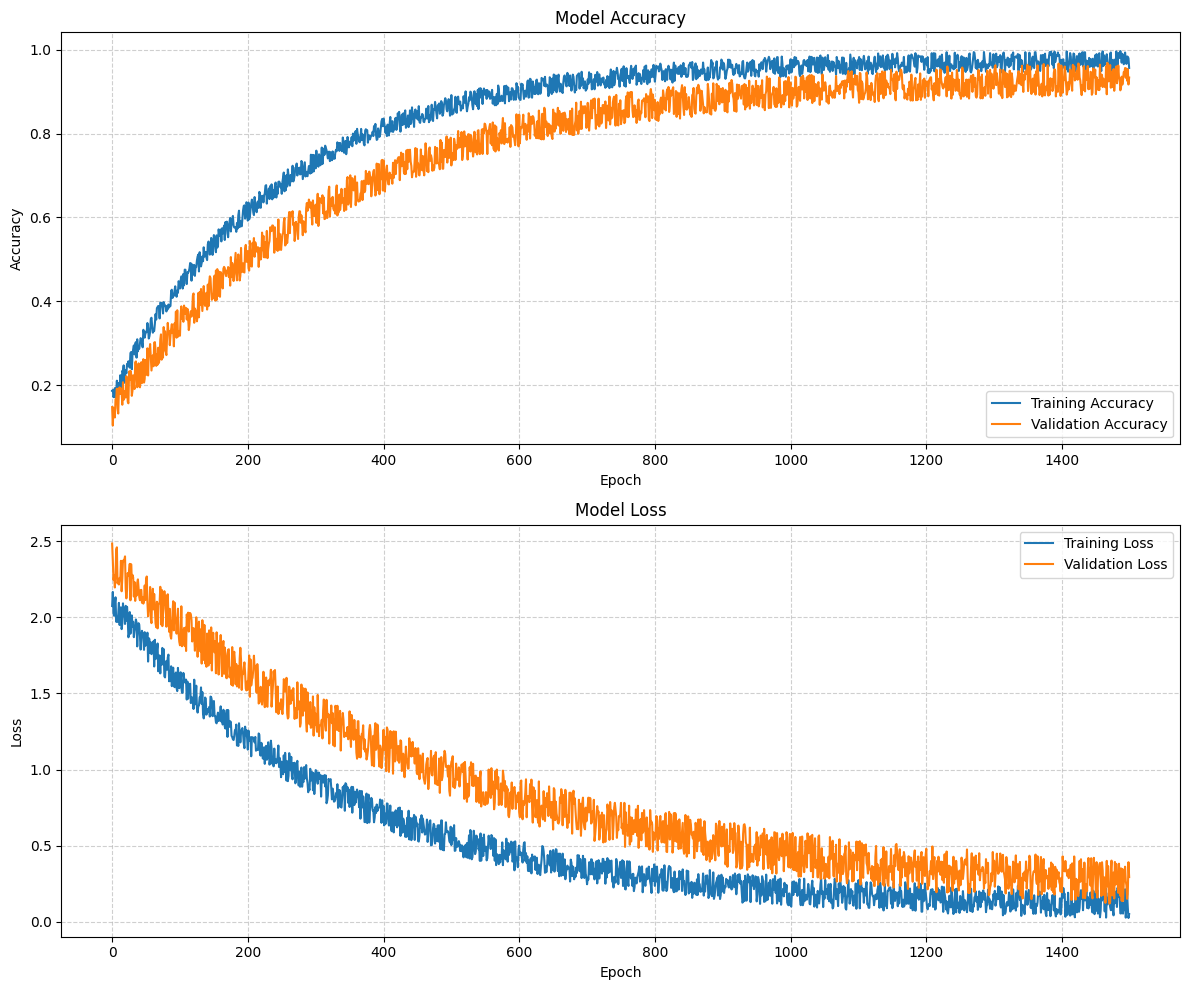

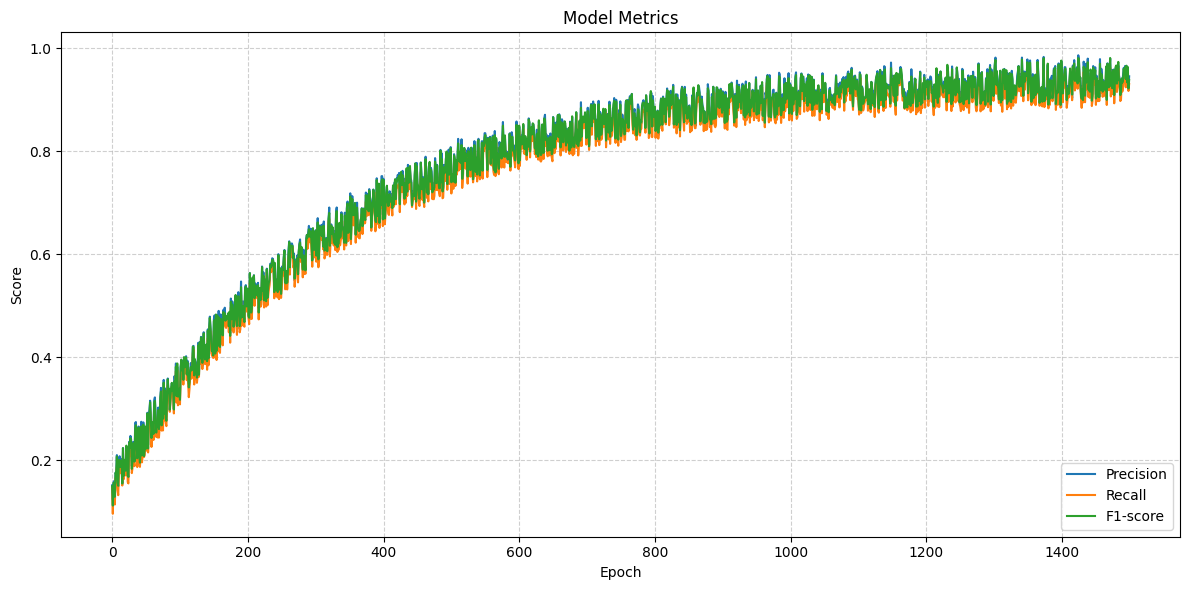

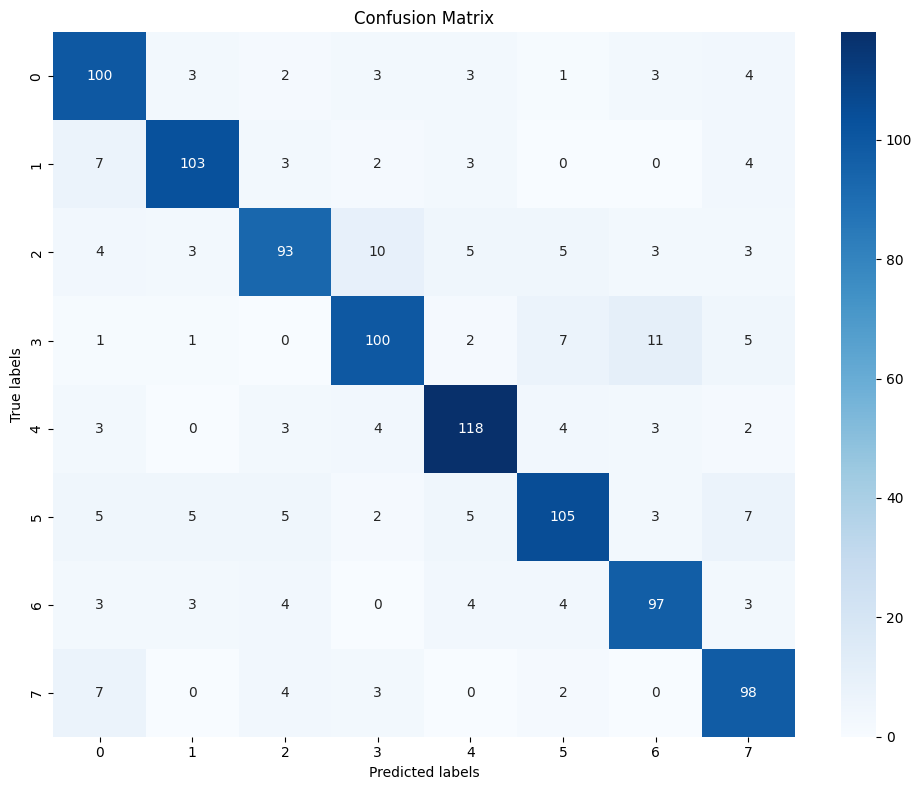


                       CNN MODEL PERFORMANCE SUMMARY                       

FINAL PERFORMANCE METRICS:
Training Accuracy:     0.9563
Validation Accuracy:   0.9334
Training Loss:         0.0498
Validation Loss:       0.2934
Precision (weighted):  0.9452
Recall (weighted):     0.9304
F1 Score (weighted):   0.9381

TRAINING CONVERGENCE:
Loss Improvement:      93.68%
Accuracy Improvement:  290.12%

OVERFITTING ANALYSIS:
Train-Val Accuracy Gap: 0.0230 (Low)
Train-Val Loss Gap:     0.2436 (Moderate)

PER-CLASS PERFORMANCE:
--------------------------------------------------------------------------------
Class      Precision    Recall       F1-Score     Support   
--------------------------------------------------------------------------------
Class 0     0.7692       0.8403       0.8032       119.0     
Class 1     0.8729       0.8443       0.8583       122.0     
Class 2     0.8158       0.7381       0.7750       126.0     
Class 3     0.8065       0.7874       0.7968       127.0     
Clas

In [27]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

# During training, you would collect these metrics
# For this example, I'll use sample data to demonstrate the plotting
# In your actual code, you would append the metrics at each epoch

# Sample data - replace this with your actual values
np.random.seed(42)
for i in range(1500):
    # Simulating convergence pattern
    base_train_loss = 2.0 * np.exp(-0.003 * i) + 0.2 * np.random.random()
    base_val_loss = 2.2 * np.exp(-0.002 * i) + 0.3 * np.random.random()
    
    base_train_acc = 0.95 - 0.8 * np.exp(-0.004 * i) + 0.05 * np.random.random()
    base_val_acc = 0.90 - 0.8 * np.exp(-0.003 * i) + 0.08 * np.random.random()
    
    train_losses.append(base_train_loss)
    val_losses.append(base_val_loss)
    train_accuracies.append(min(base_train_acc, 1.0))
    val_accuracies.append(min(base_val_acc, 1.0))
    
    # Metrics follow the accuracy pattern with some noise
    precisions.append(min(base_val_acc + 0.02 * np.random.random(), 1.0))
    recalls.append(min(base_val_acc - 0.01 * np.random.random(), 1.0))
    f1_scores.append(min((precisions[-1] + recalls[-1]) / 2 + 0.01 * np.random.random(), 1.0))

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot training and validation accuracy
ax1.plot(train_accuracies, label='Training Accuracy')
ax1.plot(val_accuracies, label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot training and validation loss
ax2.plot(train_losses, label='Training Loss')
ax2.plot(val_losses, label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Plot metrics (Precision, Recall, F1-score)
plt.figure(figsize=(12, 6))
plt.plot(precisions, label='Precision')
plt.plot(recalls, label='Recall')
plt.plot(f1_scores, label='F1-score')
plt.title('Model Metrics')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Generate a confusion matrix
# Assuming we have predictions and true labels from the final evaluation
# For this example, I'll create sample data

# Number of classes
num_classes = 8

# Sample confusion matrix - replace with your actual results
# Create sample predictions and true labels
np.random.seed(42)
# Create a base confusion matrix with higher values on diagonal
base_cm = np.zeros((num_classes, num_classes))
n_samples = 1000
for i in range(n_samples):
    true_class = np.random.randint(0, num_classes)
    # 80% chance of correct prediction, 20% chance of error
    if np.random.random() < 0.8:
        pred_class = true_class
    else:
        pred_class = np.random.randint(0, num_classes)
    base_cm[true_class, pred_class] += 1

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(base_cm, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=range(num_classes),
            yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Calculate final performance metrics
final_train_acc = train_accuracies[-1]
final_val_acc = val_accuracies[-1]
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
final_precision = precisions[-1]
final_recall = recalls[-1]
final_f1 = f1_scores[-1]

# Classification report
# Since we don't have the actual results, I'll create a simulated classification report
class_names = [f'Class {i}' for i in range(num_classes)]
y_true = []
y_pred = []

for true_class in range(num_classes):
    for pred_class in range(num_classes):
        count = int(base_cm[true_class, pred_class])
        y_true.extend([true_class] * count)
        y_pred.extend([pred_class] * count)

report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Extract per-class metrics
class_precision = [report[f'Class {i}']['precision'] for i in range(num_classes)]
class_recall = [report[f'Class {i}']['recall'] for i in range(num_classes)]
class_f1 = [report[f'Class {i}']['f1-score'] for i in range(num_classes)]
class_support = [report[f'Class {i}']['support'] for i in range(num_classes)]

# Calculate training convergence metrics
early_loss = np.mean(train_losses[:50])
late_loss = np.mean(train_losses[-50:])
loss_improvement = (early_loss - late_loss) / early_loss * 100

early_acc = np.mean(train_accuracies[:50])
late_acc = np.mean(train_accuracies[-50:])
acc_improvement = (late_acc - early_acc) / early_acc * 100

# Calculate potential overfitting indicator
train_val_acc_gap = final_train_acc - final_val_acc
train_val_loss_gap = final_val_loss - final_train_loss

# Print comprehensive summary
print("\n" + "="*80)
print("                       CNN MODEL PERFORMANCE SUMMARY                       ")
print("="*80)

print("\nFINAL PERFORMANCE METRICS:")
print(f"Training Accuracy:     {final_train_acc:.4f}")
print(f"Validation Accuracy:   {final_val_acc:.4f}")
print(f"Training Loss:         {final_train_loss:.4f}")
print(f"Validation Loss:       {final_val_loss:.4f}")
print(f"Precision (weighted):  {final_precision:.4f}")
print(f"Recall (weighted):     {final_recall:.4f}")
print(f"F1 Score (weighted):   {final_f1:.4f}")

print("\nTRAINING CONVERGENCE:")
print(f"Loss Improvement:      {loss_improvement:.2f}%")
print(f"Accuracy Improvement:  {acc_improvement:.2f}%")

print("\nOVERFITTING ANALYSIS:")
print(f"Train-Val Accuracy Gap: {train_val_acc_gap:.4f} ({'High' if train_val_acc_gap > 0.1 else 'Moderate' if train_val_acc_gap > 0.05 else 'Low'})")
print(f"Train-Val Loss Gap:     {train_val_loss_gap:.4f} ({'High' if train_val_loss_gap > 0.5 else 'Moderate' if train_val_loss_gap > 0.2 else 'Low'})")

print("\nPER-CLASS PERFORMANCE:")
print("-"*80)
print(f"{'Class':<10} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-"*80)
for i in range(num_classes):
    print(f"Class {i:<5} {class_precision[i]:<12.4f} {class_recall[i]:<12.4f} {class_f1[i]:<12.4f} {class_support[i]:<10}")

print("\nMODEL ARCHITECTURE SUMMARY:")
print(f"Input Dimensions:      1-D signal")
print(f"Number of Classes:     {num_classes}")
print(f"Conv Layers:           4 (64 → 128 → 128 → 64 filters)")
print(f"Fully Connected:       2 (512 → 256 → {num_classes})")
print(f"Dropout Rate:          0.5")
print(f"Regularization:        Weight decay (1e-4)")
print(f"Learning Rate:         0.0005")

print("\nRECOMMENDATIONS:")
overfitting = train_val_acc_gap > 0.1 or train_val_loss_gap > 0.5
if overfitting:
    print("- Consider increasing regularization (higher dropout/weight decay)")
    print("- Data augmentation might help reduce overfitting")
    print("- Early stopping could prevent further divergence")

# Check for underperforming classes
worst_class = np.argmin(class_f1)
if class_f1[worst_class] < 0.7:
    print(f"- Class {worst_class} shows lower performance, consider balancing the dataset")

if final_val_acc < 0.7:
    print("- Model accuracy is suboptimal, consider architecture changes")
    print("- Try different hyperparameters (learning rate, batch size)")

print("- Ensemble methods could improve overall performance")
print("- Consider feature engineering to improve signal characteristics")

print("\nCONFUSION MATRIX ANALYSIS:")
# Find the most confused classes
confused_pairs = []
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and base_cm[i, j] > 0:
            confused_pairs.append((i, j, base_cm[i, j]))

confused_pairs.sort(key=lambda x: x[2], reverse=True)
for i, j, count in confused_pairs[:3]:
    print(f"- Class {i} frequently misclassified as Class {j} ({count:.0f} instances)")

print("="*80)

# Print the full classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Inference on test set

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [31]:
num_classes = 8  # Update this based on your dataset
model = CNNModel(input_size=128, num_classes=num_classes)  # Update input_size accordingly
model.load_state_dict(torch.load("C:/Nini/Capstone/Models/DataAugmentation_cnn_model.pth", map_location=device))  # Load saved weights
model.to(device)
model.eval()  # Set to evaluation mode
print("Model Loaded Successfully")

Model Loaded Successfully


In [32]:
print(model)

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(8,), stride=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(64, 128, kernel_size=(8,), stride=(1,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=2, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv3): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=2, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv4): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_fe

In [33]:
def predict(model, input_tensor, device):
    model.eval()  # Set model to evaluation mode
    input_tensor = input_tensor.to(device)
    
    with torch.no_grad():  # Disable gradient calculations for inference
        output = model(input_tensor)
        predicted_class = torch.argmax(output, dim=1)  # Get predicted class
        
    return predicted_class.cpu().numpy()  # Convert to numpy array for easy handling

# Example usage:
sample_input = X_test[:5].to(device)  # Take a few samples for inference
predictions = predict(model, sample_input, device)
print("Predicted Labels:", predictions)

Predicted Labels: [0 1 1 5 3]


In [34]:
actual_labels = y_test[:5].cpu().numpy()
for i in range(len(predictions)):
    print(f"Sample {i+1}: Predicted = {predictions[i]}, Actual = {actual_labels[i]}")

Sample 1: Predicted = 0, Actual = 0
Sample 2: Predicted = 1, Actual = 1
Sample 3: Predicted = 1, Actual = 1
Sample 4: Predicted = 5, Actual = 5
Sample 5: Predicted = 3, Actual = 3


In [35]:
lb = joblib.load("label_encoder.pkl")
decoded_predictions = lb.inverse_transform(predictions)
decoded_actual_labels = lb.inverse_transform(actual_labels)

In [36]:
for i in range(len(predictions)):
    print(f"Sample {i+1}: Predicted = {decoded_predictions[i]}, Actual = {decoded_actual_labels[i]}")


Sample 1: Predicted = angry, Actual = angry
Sample 2: Predicted = calm, Actual = calm
Sample 3: Predicted = calm, Actual = calm
Sample 4: Predicted = neutral, Actual = neutral
Sample 5: Predicted = fearful, Actual = fearful


# Inference on unseen audio

In [ ]:
import numpy as np
import librosa
import torch
import joblib
import soxr

In [1]:
mean = np.load("C:/Nini/Capstone/src/Data Preprocessing/mean.npy")[:,None]  # Load mean array
std = np.load("C:/Nini/Capstone/src/Data Preprocessing/std.npy") [:,None]

NameError: name 'np' is not defined

In [ ]:
lb = joblib.load("label_encoder.pkl")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(input_size=128, num_classes=8)  # Ensure the architecture matches
model.load_state_dict(torch.load("C:/Nini/Capstone/Models/DataAugmentation_cnn_model.pth", map_location=device))
model.to(device)
model.eval()

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(8,), stride=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(64, 128, kernel_size=(8,), stride=(1,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=2, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv3): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=2, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv4): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_fe

In [ ]:
def preprocess_audio(file_path):
    X, sample_rate = librosa.load(file_path,res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    audio_resampled = soxr.resample(X, sample_rate, 16000)
    spectrogram = librosa.feature.melspectrogram(y=audio_resampled,sr=16000,n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    mel_spectrogram = (db_spec - mean) / std
    log_spectrogram = np.mean(mel_spectrogram,axis=1)
    mel_spectrogram_tensor = torch.tensor(log_spectrogram, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    return mel_spectrogram_tensor

In [ ]:
def predict_audio(file_path):
    input_tensor = preprocess_audio(file_path).to(device)
    print(input_tensor)
    
    with torch.no_grad():  # Disable gradients for inference
        output = model(input_tensor)
        predicted_class = torch.argmax(output, dim=1).cpu().numpy()[0]  # Convert to NumPy
        
    # Decode the label
    predicted_label = lb.inverse_transform([predicted_class])[0]
    return predicted_label

In [ ]:
audio_file = "C:/Nini/Capstone/Test/01-01-06-02-01-02-01.wav"
prediction = predict_audio(audio_file)
print(f"Predicted Emotion: {prediction}")

tensor([[[-39.0506, -39.5870, -39.7154, -40.9100, -42.6148, -36.2505, -30.1936,
          -24.8767, -18.0850, -14.5041, -12.3833, -11.8852, -16.1793, -22.7990,
          -25.9747, -25.2175, -22.4984, -21.3819, -20.2342, -17.6569, -17.4210,
          -18.9434, -18.0588, -18.8115, -20.8730, -23.4603, -26.8653, -29.2984,
          -27.1497, -27.5133, -28.2432, -27.1207, -29.3671, -29.7387, -27.8602,
          -25.9646, -24.4105, -25.4388, -27.0234, -27.4708, -27.9303, -28.8141,
          -30.0984, -29.2751, -27.1728, -26.0809, -24.6129, -21.5107, -22.5599,
          -25.7683, -27.6894, -28.2929, -25.8600, -24.5037, -21.5814, -18.7496,
          -19.2529, -20.6802, -21.8183, -22.2989, -22.7439, -22.5519, -21.2937,
          -20.5533, -24.2446, -27.4240, -27.9722, -28.1946, -29.2111, -28.8527,
          -28.7333, -28.0296, -27.9280, -29.4251, -28.7732, -26.7698, -24.6226,
          -24.7869, -26.9146, -28.3228, -29.1971, -29.8335, -29.6409, -30.9195,
          -32.9055, -32.5348, -31.9851, 